In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from pulp import * 
import seaborn as sns

In [31]:
data = pd.read_csv('nutrition.csv').drop('Unnamed: 0',axis=1)
data.head()

,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [32]:
data = data[['name','serving_size','calories','carbohydrate','total_fat','protein']]

<Axes: ylabel='count'>

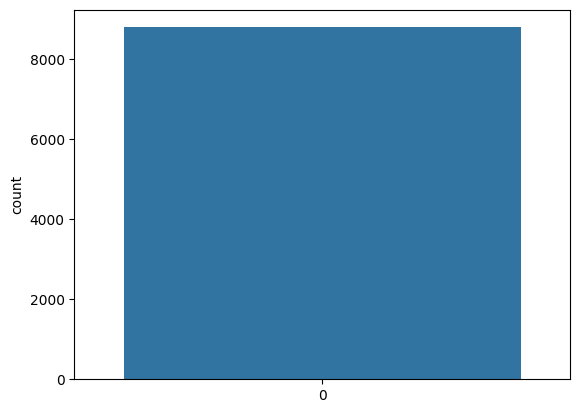

In [18]:
# data.serving_size.map(lambda x: x[:-2])
sns.countplot(data.serving_size.map(lambda x: x[:-2]))

In [33]:
data = data.drop('serving_size',axis=1)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          8789 non-null   object
 1   calories      8789 non-null   int64 
 2   carbohydrate  8789 non-null   object
 3   total_fat     8789 non-null   object
 4   protein       8789 non-null   object
dtypes: int64(1), object(4)
memory usage: 343.4+ KB


In [34]:
data['carbohydrate'] = np.array([data['carbohydrate'].tolist()[i].split(' ') for i in range(len(data))])[:,0].astype('float')
data['protein'] = np.array([data['protein'].tolist()[i].split(' ') for i in range(len(data))])[:,0].astype('float')
data['total_fat'] = np.array([data['total_fat'].tolist()[i].split('g') for i in range(len(data))])[:,0].astype('float')

In [22]:
data['total_fat']

0        0.1
1       72.0
2        0.2
3        2.4
4        2.0
        ... 
8784     3.5
8785     8.9
8786    23.0
8787     3.0
8788     3.0
Name: total_fat, Length: 8789, dtype: float64

In [29]:
data['protein']

0        0.26
1        9.17
2        0.98
3       13.30
4        1.10
        ...  
8784    23.45
8785    29.59
8786    16.74
8787    23.37
8788    23.37
Name: protein, Length: 8789, dtype: float64

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000.]),
 [Text(0, 0.0, '0'),
  Text(0, 25000.0, '25000'),
  Text(0, 50000.0, '50000'),
  Text(0, 75000.0, '75000'),
  Text(0, 100000.0, '100000'),
  Text(0, 125000.0, '125000'),
  Text(0, 150000.0, '150000'),
  Text(0, 175000.0, '175000'),
  Text(0, 200000.0, '200000'),
  Text(0, 225000.0, '225000')])

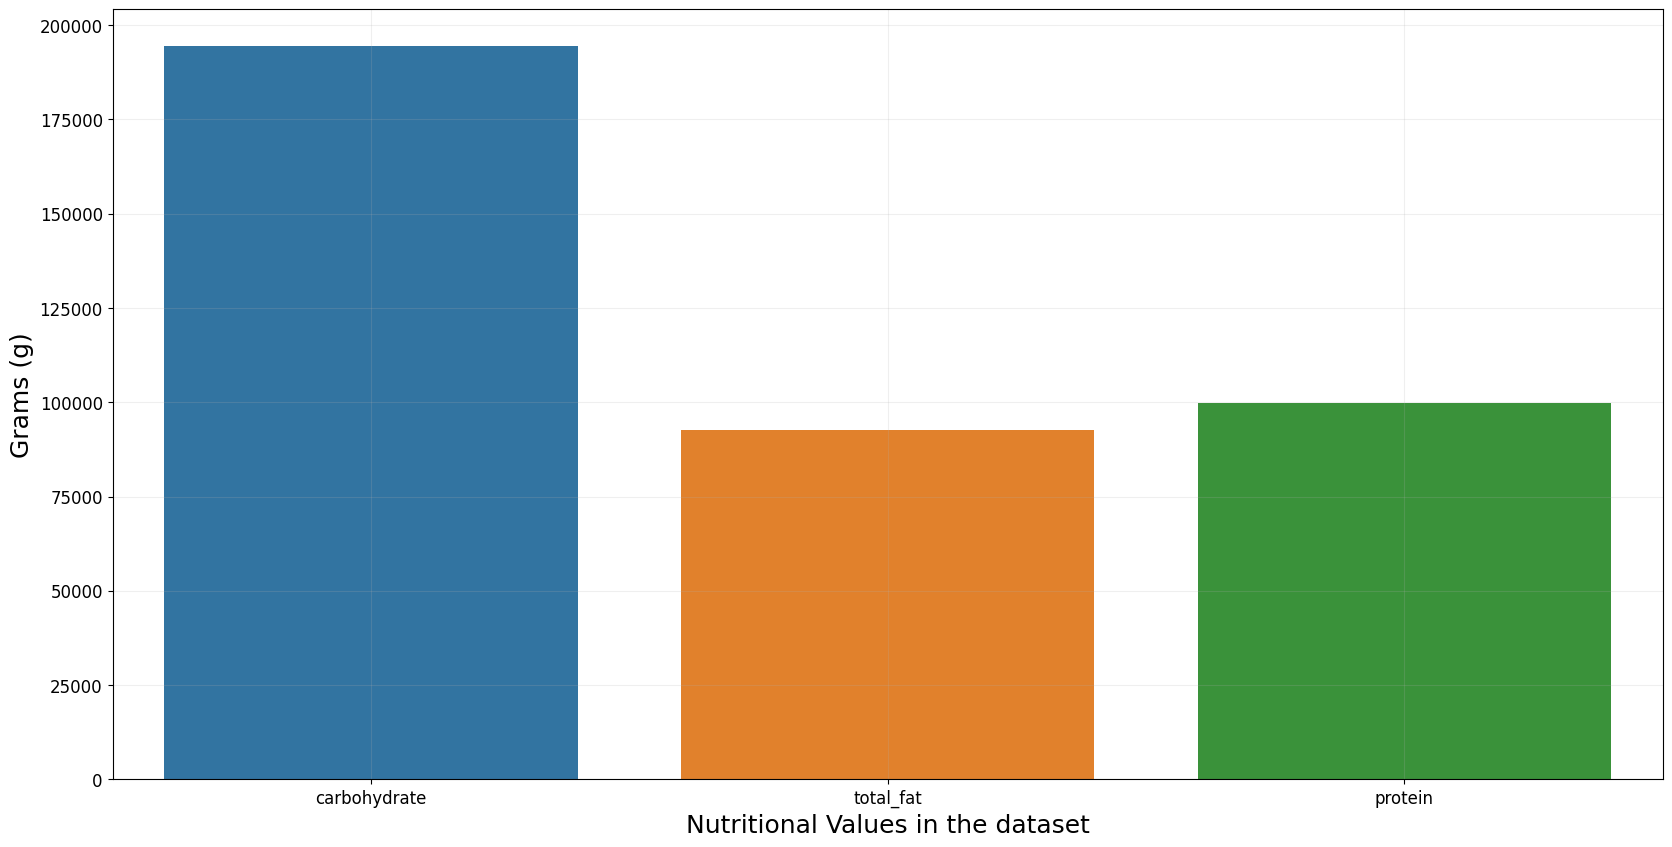

In [35]:
sums = data[['carbohydrate','total_fat','protein']].sum()

# Create DataFrame for plotting
plot_data = pd.DataFrame({'Nutritional Values': sums.index, 'Grams (g)': sums.values})

plt.figure(figsize=(20,10))
sns.barplot(x='Nutritional Values', y='Grams (g)', data=plot_data)
plt.grid(alpha=0.2)
plt.xlabel('Nutritional Values in the dataset',fontsize=18)
plt.ylabel('Grams (g)',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [40]:
list(extract_gram(build_nutritional_values(70,1500)).values())
#list(extract_gram(build_nutritional_values(70,1500)).keys())

[70.0, 187.5, 52.22222222222222]

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100'),
  Text(0, 125.0, '125'),
  Text(0, 150.0, '150'),
  Text(0, 175.0, '175'),
  Text(0, 200.0, '200')])

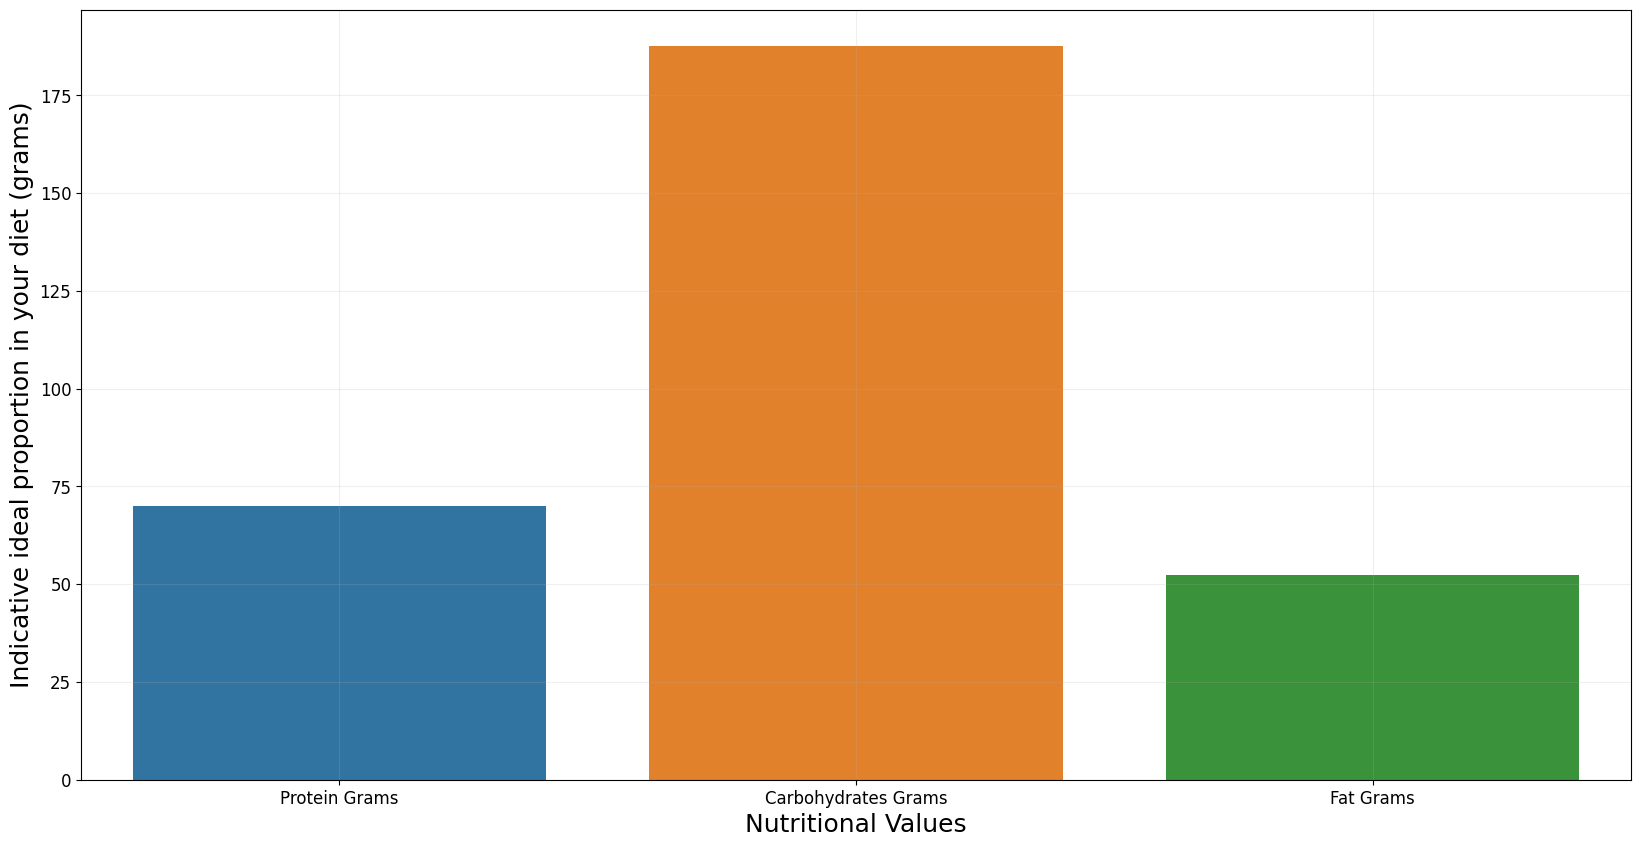

In [39]:
perfect_proportion = list(extract_gram(build_nutritional_values(70,1500)).values())
plt.figure(figsize=(20,10))
sns.barplot(x=list(extract_gram(build_nutritional_values(70,1500)).keys()), y=perfect_proportion)
plt.grid(alpha=0.2)
plt.xlabel('Nutritional Values',fontsize=18)
plt.ylabel('Indicative ideal proportion in your diet (grams)',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


In [ ]:
shuffled_data = data.sample(frac=1).reset_index().drop('index',axis=1)

In [ ]:
split_data_loc = np.linspace(0,len(shuffled_data),8).astype(int)

In [ ]:
shuffled_data.loc[split_data_loc[0]:split_data_loc[1]]

,name,calories,carbohydrate,total_fat,protein
0,"HEALTHY REQUEST, condensed, Minestrone Soup",63,11.90,0.4,2.38
1,"Ostrich, cooked, oyster",159,0.00,4.0,28.81
2,"Pork, raw or unheated, breakfast strips, cured",388,0.70,37.0,11.74
3,"Babyfood, junior, tutti frutti, fruit",69,16.00,0.4,0.40
4,"Candies, SKITTLES Tropical Bite Size Candies, ...",405,90.77,4.3,0.19
...,...,...,...,...,...
1251,"Tomatoes, year round average, raw, ripe, red",18,3.89,0.2,0.88
1252,"Crustaceans, made from surimi, imitation, mixe...",101,9.13,1.5,12.39
1253,"Plums, solids and liquids, juice pack, purple,...",58,15.15,0.0,0.51
1254,"Pork, simmered, cooked, feet, variety meats an...",238,0.00,16.0,21.94


In [36]:
def build_nutritional_values(kg,calories):
    protein_calories = kg*4
    res_calories = calories-protein_calories
    carb_calories = calories/2.
    fat_calories = calories-carb_calories-protein_calories
    res = {'Protein Calories':protein_calories,'Carbohydrates Calories':carb_calories,'Fat Calories':fat_calories}
    return res

In [ ]:
build_nutritional_values(70,2000)

{'Protein Calories': 280,
 'Carbohydrates Calories': 1000.0,
 'Fat Calories': 720.0}

In [38]:
def extract_gram(table):
    protein_grams = table['Protein Calories']/4.
    carbs_grams = table['Carbohydrates Calories']/4.
    fat_grams = table['Fat Calories']/9.
    res = {'Protein Grams':protein_grams, 'Carbohydrates Grams':carbs_grams,'Fat Grams':fat_grams}
    return res

In [ ]:
print(build_nutritional_values(70,1500))
print(extract_gram(build_nutritional_values(70,1500)))

{'Protein Calories': 280, 'Carbohydrates Calories': 750.0, 'Fat Calories': 470.0}
{'Protein Grams': 70.0, 'Carbohydrates Grams': 187.5, 'Fat Grams': 52.22222222222222}


https://www.healthline.com/health/balanced-diet#calories

https://i-base.info/guides/side/diet-a-balanced-diet-and-your-health

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

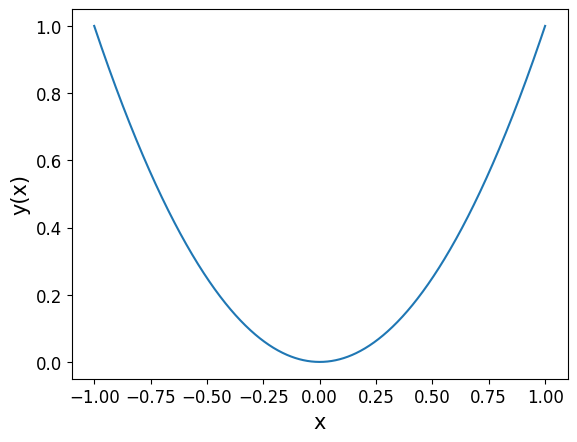

In [ ]:
x = np.linspace(-1,1,1000)
plt.plot(x,x**2)
plt.xlabel('x',fontsize=15)
plt.ylabel('y(x)',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [ ]:
# import jovian
# jovian.commit()

## Version 8

In [42]:
data['carbohydrate'] = np.array([data['carbohydrate'].tolist()[i].split(' ') for i in range(len(data))])[:,0].astype('float')
data['protein'] = np.array([data['protein'].tolist()[i].split(' ') for i in range(len(data))])[:,0].astype('float')
data['total_fat'] = np.array([data['total_fat'].tolist()[i].split('g') for i in range(len(data))])[:,0].astype('float')

AttributeError: 'float' object has no attribute 'split'

In [43]:
week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
split_values = np.linspace(0,len(data),8).astype(int)
split_values[-1] = split_values[-1]-1
def random_dataset():
    frac_data = data.sample(frac=1).reset_index().drop('index',axis=1)
    day_data = []
    for s in range(len(split_values)-1):
        day_data.append(frac_data.loc[split_values[s]:split_values[s+1]])
    return dict(zip(week_days,day_data))

In [44]:
random_dataset()['Monday']

,name,calories,carbohydrate,total_fat,protein
0,"Popovers, enriched, dry mix",371,71.00,4.3,10.40
1,"Beef, raw, choice, trimmed to 1/8"" fat, separa...",138,0.00,5.8,21.34
2,"PACE, Tequila Lime Salsa",47,9.38,0.0,0.00
3,"Cookies, coconut macaroon",460,61.22,23.0,3.02
4,"Squash, without salt, boiled, cooked, frozen, ...",39,10.05,0.1,1.23
...,...,...,...,...,...
1251,"KFC, Coleslaw",144,15.65,8.6,0.91
1252,"SUNSHINE, Cheez-It Crackers, GRIPZ",491,61.00,23.0,11.00
1253,"Beans, without salt, boiled, cooked, mature se...",144,25.28,1.1,9.16
1254,"Fish, drained solids, without salt, canned in ...",128,0.00,3.0,23.62


In [81]:
days_data = random_dataset()
def model(day,kg,calories):
    G = extract_gram(build_nutritional_values(kg,calories))
    E = G['Carbohydrates Grams']
    F = G['Fat Grams']
    P = G['Protein Grams']
    day_data = days_data[day]
    day_data = day_data[day_data.calories!=0]
    food = day_data.name.tolist()
    c  = day_data.calories.tolist()
    x  = pulp.LpVariable.dicts( "x", indices = food, lowBound=0, upBound=1.5, cat='Continuous', indexStart=[] )
    e = day_data.carbohydrate.tolist()
    f = day_data.total_fat.tolist()
    p = day_data.protein.tolist()
    prob  = pulp.LpProblem( "Diet", LpMinimize )
    prob += pulp.lpSum( [x[food[i]]*c[i] for i in range(len(food))]  )
    prob += pulp.lpSum( [x[food[i]]*e[i] for i in range(len(x)) ] )>=E
    prob += pulp.lpSum( [x[food[i]]*f[i] for i in range(len(x)) ] )>=F
    prob += pulp.lpSum( [x[food[i]]*p[i] for i in range(len(x)) ] )>=P
    prob.solve()
    variables = []
    values = []
    for v in prob.variables():
        variable = v.name
        value = v.varValue
        variables.append(variable)
        values.append(value)
    values = np.array(values).round(2).astype(float)
    sol = pd.DataFrame(np.array([food,values]).T, columns = ['Food','Quantity'])
    sol['Quantity'] = sol.Quantity.astype(float)
    return sol



### Nitish's code

In [82]:
import pickle

with open('days_data.pkl', 'wb') as file:
    pickle.dump(days_data, file)
    
type(days_data)

dict

In [83]:
# import pickle

# with open('days_data.pkl', 'rb') as file:
#     days_data = pickle.load(file)

# type(days_data)

dict

In [ ]:
sol_monday = model('Monday',70,1500)

In [ ]:
sol_monday = sol_monday[sol_monday['Quantity']!=0.0]
sol_monday.Quantity = sol_monday.Quantity*100
sol_monday = sol_monday.rename(columns={'Quantity':'Quantity (g)'})
sol_monday

,Food,Quantity (g)
379,"Tofu, prepared with calcium sulfate, salted an...",150.0
459,"Beef, braised, cooked, choice, trimmed to 0"" f...",150.0
834,"Lamb, roasted, cooked, choice, trimmed to 1/4""...",52.0
1118,"SILK Light Plain, soymilk",88.0
1152,"Sweet rolls, commercially prepared with raisin...",150.0
1162,"PACE, Tequila Lime Salsa",7.0
1234,"USDA Commodity, solids and liquids, light syru...",150.0


## Version 9

In [ ]:
def model(prob,day,kg,calories):
    G = extract_gram(build_nutritional_values(kg,calories))
    E = G['Carbohydrates Grams']
    F = G['Fat Grams']
    P = G['Protein Grams']
    day_data = days_data[day]
    day_data = day_data[day_data.calories!=0]
    food = day_data.name.tolist()
    c  = day_data.calories.tolist()
    x  = pulp.LpVariable.dicts( "x", indices = food, lowBound=0, upBound=1.5, cat='Continuous', indexStart=[] )
    e = day_data.carbohydrate.tolist()
    f = day_data.total_fat.tolist()
    p = day_data.protein.tolist()
#    prob  = pulp.LpProblem( "Diet", LpMinimize )
    prob += pulp.lpSum( [x[food[i]]*c[i] for i in range(len(food))]  )
    prob += pulp.lpSum( [x[food[i]]*e[i] for i in range(len(x)) ] )>=E
    prob += pulp.lpSum( [x[food[i]]*f[i] for i in range(len(x)) ] )>=F
    prob += pulp.lpSum( [x[food[i]]*p[i] for i in range(len(x)) ] )>=P
    prob.solve()
    variables = []
    values = []
    for v in prob.variables():
        variable = v.name
        value = v.varValue
        variables.append(variable)
        values.append(value)
    values = np.array(values).round(2).astype(float)
    sol = pd.DataFrame(np.array([food,values]).T, columns = ['Food','Quantity'])
    sol['Quantity'] = sol.Quantity.astype(float)
    sol = sol[sol['Quantity']!=0.0]
    sol.Quantity = sol.Quantity*100
    sol = sol.rename(columns={'Quantity':'Quantity (g)'})
    return sol

def total_model(kg,calories):
    result = []
    for day in week_days:
        prob  = pulp.LpProblem( "Diet", LpMinimize )
        print('Building a model for day %s \n'%(day))
        result.append(model(prob,day,kg,calories))
    return dict(zip(week_days,result))

In [ ]:
diet = total_model(70,3000)

Building a model for day Monday 

Building a model for day Tuesday 

Building a model for day Wednesday 

Building a model for day Thursday 

Building a model for day Friday 

Building a model for day Saturday 

Building a model for day Sunday 



In [ ]:
diet

{'Monday':                                                    Food  Quantity (g)
 246   Beef, raw, select, trimmed to 1/8" fat, separa...         122.0
 379   Tofu, prepared with calcium sulfate, salted an...          96.0
 459   Beef, braised, cooked, choice, trimmed to 0" f...         150.0
 612   Beef, raw, all grades, trimmed to 0" fat, sepa...         150.0
 849                                KEEBLER, Sugar Cones          30.0
 1218                                   Cheese, cheshire         150.0,
 'Tuesday':                                                    Food  Quantity (g)
 16                                Peppers, raw, serrano         150.0
 256   Pork, broiled, cooked, with added solution, se...         150.0
 384   Candies, RAISINETS Chocolate Covered Raisins, ...         150.0
 750   Incaparina, unprepared, dry mix (corn and soy ...          77.0
 757     Fast foods, with crispy chicken fillet, biscuit         150.0
 789   Mung beans, without salt, drained, boiled, coo..

## Step 1: Calculate Your BMR
For women, BMR = 655.1 + (9.563 x weight in kg) + (1.850 x height in cm) - (4.676 x age in years)
For men, BMR = 66.47 + (13.75 x weight in kg) + (5.003 x height in cm) - (6.755 x age in years)

## Step 2: Calculate Your AMR
Sedentary (little or no exercise): AMR = BMR x 1.2
Lightly active (exercise 1–3 days/week): AMR = BMR x 1.375
Moderately active (exercise 3–5 days/week): AMR = BMR x 1.55
Active (exercise 6–7 days/week): AMR = BMR x 1.725
Very active (hard exercise 6–7 days/week): AMR = BMR x 1.9

* https://www.verywellfit.com/how-many-calories-do-i-need-each-day-2506873 *


In [ ]:
def calculate_calorie_requirements(gender, age, height_cm, weight_kg):
    # Constants for calorie calculation
    BMR_MALE = 88.362
    BMR_FEMALE = 447.593
    ACTIVITY_MULTIPLIER = 1.375  # Slightly active

    # Determine BMR based on gender
    if gender == 'M':
        bmr = BMR_MALE
    elif gender == 'F':
        bmr = BMR_FEMALE
    else:
        raise ValueError("Invalid gender. Use 'M' for Male or 'F' for Female.")

    # Calculate BMR using the Mifflin-St Jeor equation
    bmr += 13.397 * weight_kg + 4.799 * height_cm - 5.677 * age

    # Calculate daily calorie requirements based on activity level
    daily_calories = bmr * ACTIVITY_MULTIPLIER

    return daily_calories

# Example usage:
gender = 'M'  # 'M' for Male or 'F' for Female
age = 30
height_cm = 175  # Height in centimeters
weight_kg = 70  # Weight in kilograms

calorie_requirements = calculate_calorie_requirements(gender, age, height_cm, weight_kg)
print(f"Daily calorie requirements: {calorie_requirements} calories")


Daily calorie requirements: 2331.5421250000004 calories
